In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
# Loading test/train prediction output from the model and converting to time index

filename1 = r'Brunei_Champion7_GT4_tst_pred_01Mar2019_01Jul2019_w1d_m3hr.csv'
#filename2 = r"Brunei_Champion7_GT4_trn_pred_01Jun2018_28Feb2019.csv"

#dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M')
df = pd.read_csv(filename1, parse_dates = ['timestamp'])
df.set_index('timestamp', inplace = True)
df['date'] = df.index


In [ ]:
#Minimum threshold of training period: 6 months 
#Minimum threshold of testing period: 3 months
#Preferred FREQUENCY of metrics calculation: Weekly 

In [22]:
# Changing -1 to 1 and 1 to 0 [1 denotes anomaly, 0 denotes normal]

df.prediction = df.prediction.replace(1, 0)
df.prediction = df.prediction.replace(-1, 1)

df['anomaly'] = 0
df.loc[(df['system_status'] == 'online') & (df['prediction'] == 1), 'anomaly'] = 1

df['normal'] = 0
df.loc[(df['system_status'] == 'online') & (df['prediction'] == 0), 'normal'] = 1

df['sys_status'] = 0
df.loc[(df['system_status'] == 'online'), 'sys_status'] = 1
df.loc[(df['system_status'] == 'offline'), 'sys_status'] = 0

df['flips'] = 0
df.loc[(df['system_status'] == 'online') & (df['alert'] == 1) & (df['prediction'] == 1), 'flips'] = 1

df['counter_flips'] = 0
df.loc[(df['system_status'] == 'online') & (df['alert'] == 0) & (df['prediction'] == 1), 'counter_flips'] = 1


In [23]:
## Creating results dataframe

resultsdf = df[['anomaly','flips','counter_flips', 'normal', 'sys_status']].resample('W').sum()
#resultsdf = df[['anomaly','flips','counter_flips', 'normal']].resample('W').sum()
resultsdf.columns = ['anomaly_count','flips_count','counter_flips_count','model_uptime_count','online_status_count']
#resultsdf.columns = ['anomaly_count','flips_count','counter_flips_count','model_uptime_count']

x = df[['prediction', 'sys_status']].resample('W').count()

resultsdf['Total_counts'] = x['prediction']

resultsdf['anomaly_ratio'] = (resultsdf['anomaly_count'] / resultsdf['Total_counts']).round(2)
resultsdf['flips_ratio'] = (resultsdf['flips_count'] / resultsdf['Total_counts']).round(2)
resultsdf['counter_flips_ratio'] = (resultsdf['counter_flips_count'] / resultsdf['Total_counts']).round(2)
resultsdf['model_uptime_ratio'] = (resultsdf['model_uptime_count'] / resultsdf['Total_counts']).round(2)
resultsdf ['machine availability'] =  ((resultsdf['online_status_count']/ (x['sys_status'])) * 100).round(2)


In [7]:
#len(resultsdf) #datapoints  

In [24]:
resultsdf.drop(resultsdf.tail(1).index, inplace = True)

In [25]:
len(resultsdf)

18

In [26]:
resultsdf1 = resultsdf.head(14)
#resultsdf1.to_csv('validation_set_MarToMay2019.csv')

resultsdf2 = resultsdf.tail(4)

In [8]:
##train dataset

#resultsdf.fillna(0, inplace = True)

# TEST DATA/TRAIN DATA

Text(0.5, 1.0, 'Distribution over 4 months testing period')

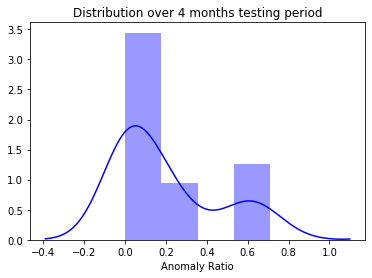

In [22]:
# Create anomaly ratio distribution plot

#sns.kdeplot(resultsdf['anomaly_ratio'], color = "b") 
#plt.hist(resultsdf['anomaly_ratio'])

ax = sns.distplot(resultsdf['anomaly_ratio'], color = "b")
ax.set(xlabel = 'Anomaly Ratio')
plt.title ('Distribution over 4 months testing period')


Text(0.5, 1.0, 'Distribution over 4 months testing period')

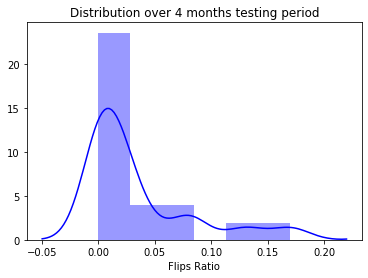

In [23]:
# Create flips ratio distribution plot

ax = sns.distplot(resultsdf['flips_ratio'], color = "b")
ax.set(xlabel = 'Flips Ratio')
plt.title ('Distribution over 4 months testing period')

Text(0.5, 1.0, 'Distribution over 4 months testing period')

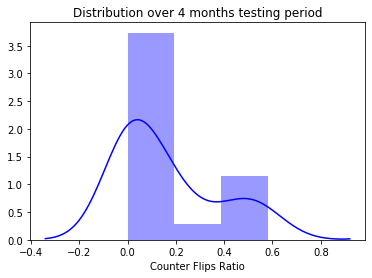

In [24]:
# Create counter_flips ratio distribution plot

ax = sns.distplot(resultsdf['counter_flips_ratio'], color = "b") 
ax.set(xlabel = 'Counter Flips Ratio')
plt.title ('Distribution over 4 months testing period')

Text(0.5, 1.0, 'Distribution over 4 months testing period')

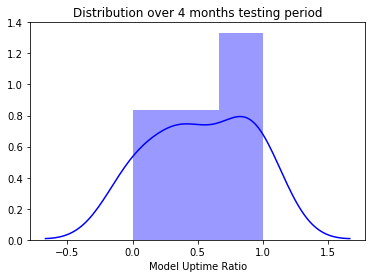

In [25]:
# Create model_uptime_ratio distribution plot

ax = sns.distplot(resultsdf['model_uptime_ratio'], color = "b") 
ax.set(xlabel = 'Model Uptime Ratio')
plt.title ('Distribution over 4 months testing period')

In [27]:
import numpy as np
from statistics import stdev

In [28]:
n = len(resultsdf1)

A11 = np.mean(resultsdf1['anomaly_ratio'])
A22 = np.mean(resultsdf1['flips_ratio'])
A33 = np.mean(resultsdf1['counter_flips_ratio'])
A44 = np.mean(resultsdf1['model_uptime_ratio'])

#Mi22 = min(resultsdf1['flips_ratio'])
#Mi33 = min(resultsdf1['counter_flips_ratio'])
#Mi44 = min(resultsdf1['model_uptime_ratio'])

#Ma11 = max(resultsdf1['anomaly_ratio'])
#Ma22 = max(resultsdf1['flips_ratio'])
#Ma33 = max(resultsdf1['counter_flips_ratio'])
#Ma44 = max(resultsdf1['model_uptime_ratio'])

#S11 = np.std(resultsdf['anomaly_ratio'])
S11 = stdev(resultsdf1['anomaly_ratio'])
S22 = stdev(resultsdf1['flips_ratio'])
S33 = stdev(resultsdf1['counter_flips_ratio'])
S44 = stdev(resultsdf1['model_uptime_ratio'])


In [29]:
dff = pd.DataFrame(columns = ['Weeks', 'Metrics', 'Average', 'Standard Deviation'])

df1 = dff.append({'Weeks':n, 'Metrics':'Anomaly Ratio', 'Average':A11, 'Standard Deviation':S11}, ignore_index = True)
df2 = df1.append({'Weeks':n, 'Metrics':'Flips Ratio', 'Average':A22, 'Standard Deviation':S22}, ignore_index = True)   
df3 = df2.append({'Weeks':n, 'Metrics':'Counter Flips Ratio', 'Average':A33, 'Standard Deviation':S33}, ignore_index = True)
df0 = df3.append({'Weeks':n, 'Metrics':'Model Uptime Ratio', 'Average':A44, 'Standard Deviation':S44}, ignore_index = True)

df0

,Weeks,Metrics,Average,Standard Deviation
0,14,Anomaly Ratio,0.201429,0.258274
1,14,Flips Ratio,0.036429,0.053437
2,14,Counter Flips Ratio,0.163571,0.208828
3,14,Model Uptime Ratio,0.455714,0.377496


In [12]:
#ax = sns.distplot(resultsdf['anomaly_ratio'], color = "b")
#ax.set(xlabel = 'Anomaly Ratio')

#ax = sns.distplot(resultsdf1['anomaly_ratio'], color = 'r')

In [31]:
n = len(resultsdf2)

A11_1 = np.mean(resultsdf2['anomaly_ratio'])
A22_1 = np.mean(resultsdf2['flips_ratio'])
A33_1 = np.mean(resultsdf2['counter_flips_ratio'])
A44_1 = np.mean(resultsdf2['model_uptime_ratio'])

#S11 = np.std(resultsdf['anomaly_ratio'])
S11_1 = stdev(resultsdf2['anomaly_ratio'])
S22_1 = stdev(resultsdf2['flips_ratio'])
S33_1 = stdev(resultsdf2['counter_flips_ratio'])
S44_1 = stdev(resultsdf2['model_uptime_ratio'])

s1 = S11_1 - S11
s2 = S22_1 - S22
s3 = S33_1 - S33
s4 = S44_1 - S44

a1 = A11_1 - A11
a2 = A22_1 - A22
a3 = A33_1 - A33
a4 = A44_1 - A44

In [32]:
dff = pd.DataFrame(columns = ['Weeks', 'Metrics', 'Average', 'Standard Deviation', 'Size (SD)', 'Size (mean)'])

df1 = dff.append({'Weeks':n, 'Metrics':'Anomaly Ratio', 'Average':A11_1, 'Standard Deviation':S11_1, 'Size (SD)': s1, 'Size (mean)': a1}, ignore_index = True)
df2 = df1.append({'Weeks':n, 'Metrics':'Flips Ratio', 'Average':A22_1, 'Standard Deviation':S22_1, 'Size (SD)' : s2, 'Size (mean)': a2}, ignore_index = True)   
df3 = df2.append({'Weeks':n, 'Metrics':'Counter Flips Ratio', 'Average':A33_1, 'Standard Deviation':S33_1, 'Size (SD)': s3, 'Size (mean)': a3}, ignore_index = True)
df0 = df3.append({'Weeks':n, 'Metrics':'Model Uptime Ratio', 'Average':A44_1, 'Standard Deviation':S44_1, 'Size (SD)': s4, 'Size (mean)': a4}, ignore_index = True)

df0

,Weeks,Metrics,Average,Standard Deviation,Size (SD),Size (mean)
0,4,Anomaly Ratio,0.201429,0.259487,0.001213,-0.001429
1,4,Flips Ratio,0.036429,0.035940,-0.017497,-0.008929
2,4,Counter Flips Ratio,0.163571,0.226477,0.017648,0.003929
3,4,Model Uptime Ratio,0.455714,0.269568,-0.107929,0.324286


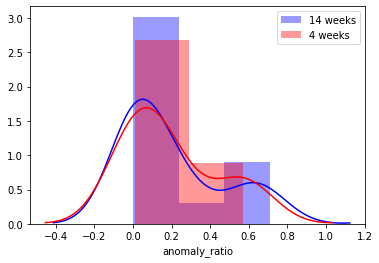

In [33]:
ax = sns.distplot(resultsdf1['anomaly_ratio'], color = "b", label = '14 weeks')
ax.set(xlabel = 'Anomaly Ratio')
ax = sns.distplot(resultsdf2['anomaly_ratio'], color = 'r', label = '4 weeks')

ax.legend()

In [1]:
#resultsdf.head(20)

In [2]:
#df[['anomaly','flips','counter_flips', 'normal']].resample('M').sum()